TASK 1 - 2d Scaling Transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

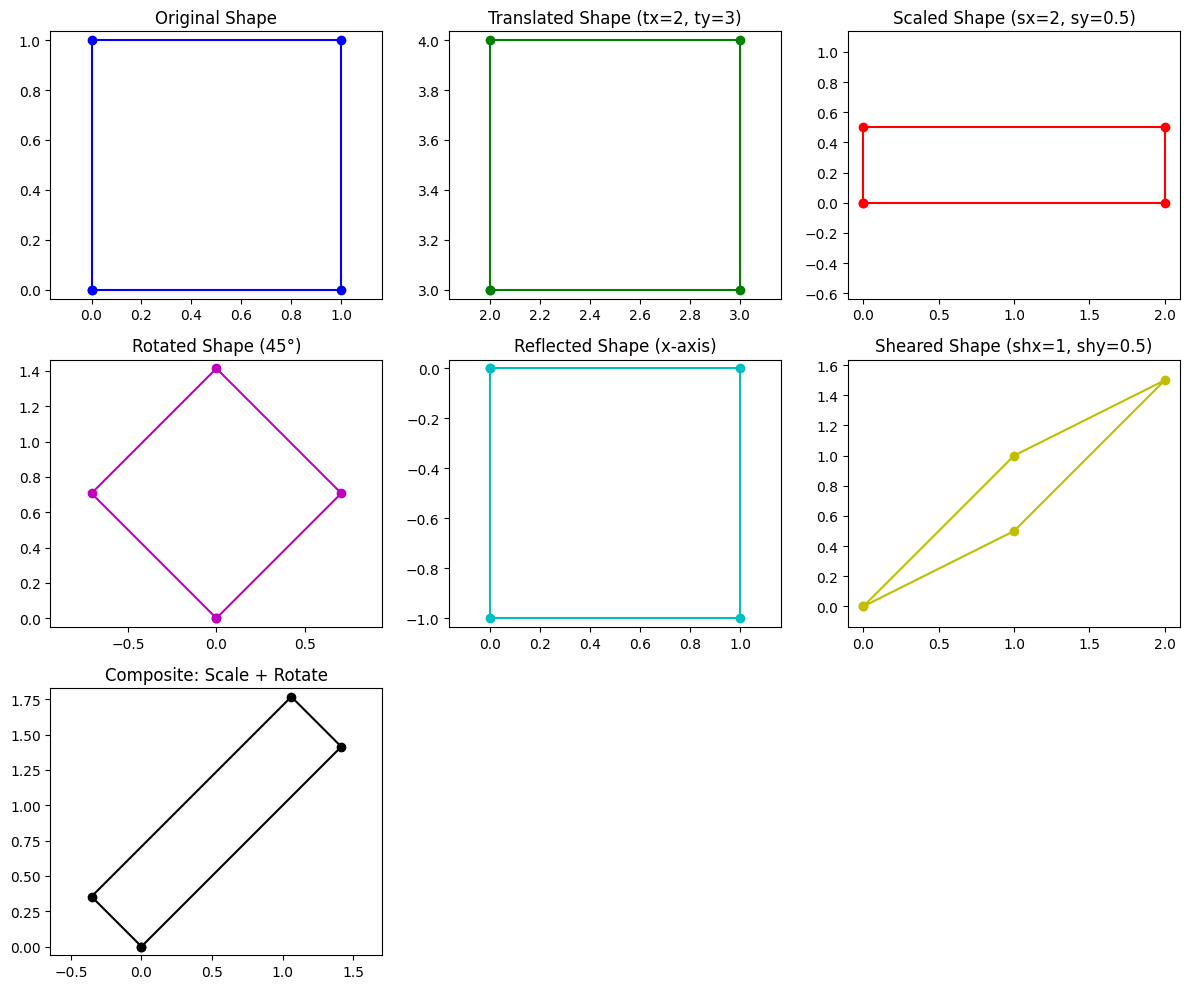

In [ ]:
def plot_shape(points, title, color='b'):
    """Plot a 2D shape given its vertices."""
    points = np.append(points, [points[0]], axis=0) 
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')

def translate(points, tx, ty):
    """Perform translation on a 2D object."""
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  
    transformed_points = points_h @ translation_matrix.T
    return transformed_points[:, :2]

def scale(points, sx, sy):
    """Perform scaling on a 2D object."""
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  
    transformed_points = points_h @ scaling_matrix.T
    return transformed_points[:, :2]

def rotate(points, angle):
    """Perform rotation on a 2D object."""
    radians = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    points_h = np.c_[points, np.ones(points.shape[0])]  
    transformed_points = points_h @ rotation_matrix.T
    return transformed_points[:, :2]

def reflect(points, axis):
    """Perform reflection on a 2D object."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    points_h = np.c_[points, np.ones(points.shape[0])] 
    transformed_points = points_h @ reflection_matrix.T
    return transformed_points[:, :2]

def shear(points, shx, shy):
    """Perform shearing on a 2D object."""
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    points_h = np.c_[points, np.ones(points.shape[0])]  
    transformed_points = points_h @ shearing_matrix.T
    return transformed_points[:, :2]

def composite_transform(points, transformations):
    """Perform composite transformations on a 2D object."""
    composite_matrix = np.eye(3)
    for transform in transformations:
        composite_matrix = transform @ composite_matrix
    points_h = np.c_[points, np.ones(points.shape[0])]  
    transformed_points = points_h @ composite_matrix.T
    return transformed_points[:, :2]

square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Original shape
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
plot_shape(square, "Original Shape", 'b')

# Translation
translated_square = translate(square, 2, 3)
plt.subplot(3, 3, 2)
plot_shape(translated_square, "Translated Shape (tx=2, ty=3)", 'g')

# Scaling
scaled_square = scale(square, 2, 0.5)
plt.subplot(3, 3, 3)
plot_shape(scaled_square, "Scaled Shape (sx=2, sy=0.5)", 'r')

# Rotation
rotated_square = rotate(square, 45)
plt.subplot(3, 3, 4)
plot_shape(rotated_square, "Rotated Shape (45°)", 'm')

# Reflection
reflected_square = reflect(square, 'x')
plt.subplot(3, 3, 5)
plot_shape(reflected_square, "Reflected Shape (x-axis)", 'c')

# Shearing
sheared_square = shear(square, 1, 0.5)
plt.subplot(3, 3, 6)
plot_shape(sheared_square, "Sheared Shape (shx=1, shy=0.5)", 'y')

# Composite Transformation: Scale + Rotate
scaling_matrix = np.array([[2, 0, 0], [0, 0.5, 0], [0, 0, 1]])
rotation_matrix = np.array([
    [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
    [np.sin(np.radians(45)), np.cos(np.radians(45)), 0],
    [0, 0, 1]
])
composite_square = composite_transform(square, [scaling_matrix, rotation_matrix])
plt.subplot(3, 3, 7)
plot_shape(composite_square, "Composite: Scale + Rotate", 'k')

plt.tight_layout()
plt.show()


TASK 2 - Image Transformations:


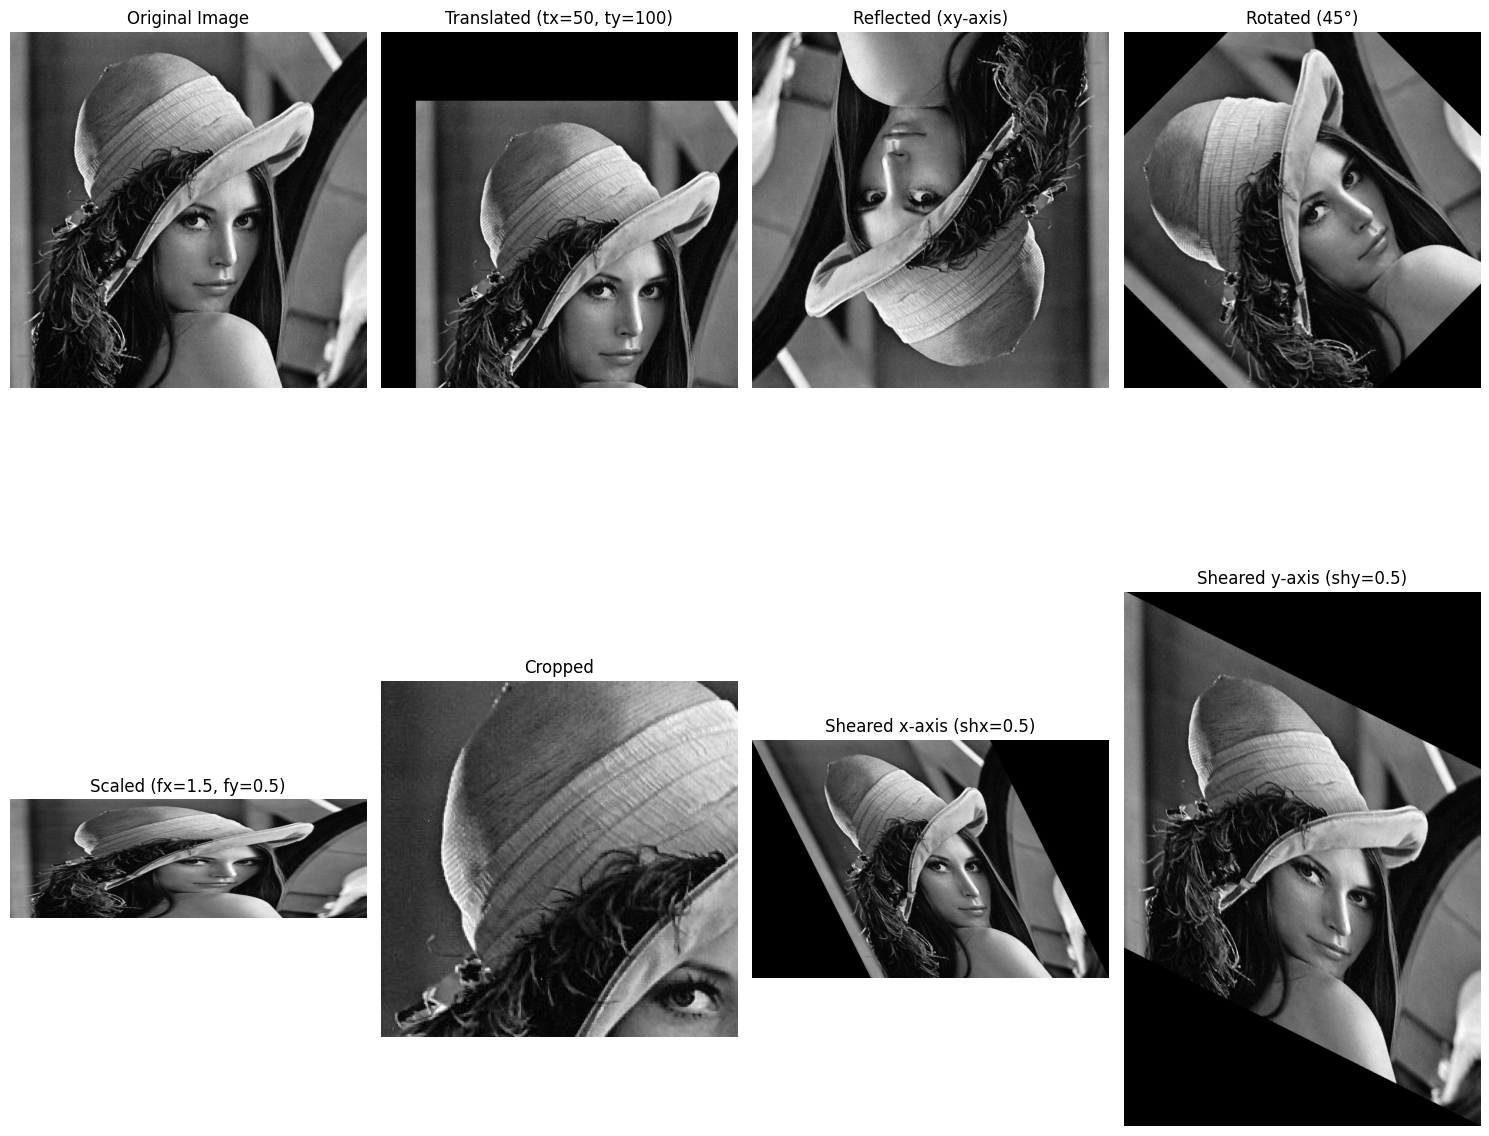

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and display images
def show_subplots(images, titles, rows, cols, figsize=(15, 15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()  # Flatten the 2D grid into a 1D array
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Load 
image_path = "/content/sample_data/Picture1.jpg"  
image = cv2.imread(image_path)

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    return translated_img

translated_image = translate_image(image, 50, 100)

# 2. Reflection
def reflect_image(img, axis):
    if axis == 'x':  # Reflect along x-axis
        reflected_img = cv2.flip(img, 0)
    elif axis == 'y':  # Reflect along y-axis
        reflected_img = cv2.flip(img, 1)
    elif axis == 'xy':  # Reflect along both axes
        reflected_img = cv2.flip(img, -1)
    else:
        raise ValueError("Invalid axis. Use 'x', 'y', or 'xy'.")
    return reflected_img

reflected_image = reflect_image(image, 'xy')

# 3. Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img

rotated_image = rotate_image(image, 45)

# 4. Scaling
def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_img

scaled_image = scale_image(image, 1.5, 0.5)

# 5. Cropping
def crop_image(img, x_start, y_start, x_end, y_end):
    cropped_img = img[y_start:y_end, x_start:x_end]
    return cropped_img

cropped_image = crop_image(image, 50, 50, 300, 300)

# 6. Shearing in x-axis
def shear_image_x(img, shx):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols + int(rows * shx), rows))
    return sheared_img

sheared_image_x = shear_image_x(image, 0.5)

# 7. Shearing in y-axis
def shear_image_y(img, shy):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols, rows + int(cols * shy)))
    return sheared_img

sheared_image_y = shear_image_y(image, 0.5)

images = [
    image, translated_image, reflected_image,
    rotated_image, scaled_image, cropped_image,
    sheared_image_x, sheared_image_y
]
titles = [
    "Original Image", "Translated (tx=50, ty=100)", "Reflected (xy-axis)",
    "Rotated (45°)", "Scaled (fx=1.5, fy=0.5)", "Cropped",
    "Sheared x-axis (shx=0.5)", "Sheared y-axis (shy=0.5)"
]

# Display all transformations
show_subplots(images, titles, rows=2, cols=4)
